<h1 align="center"><strong>COMPANY REPUTATION ANALYSER 🧐</strong></h1>

<h1  align="center"><font color="OrangeRed">Project Cycle</font></h1>

<h2>CRISP-DM</h2>

- **CR**oss-**I**ndustry **S**tandard **P**rocess for **D**ata **M**ining

![crisp-dm](../../img/original-crisp-dm.png)

<h1  align="center"><font color="OrangeRed">Problem Understanding</font></h1>

<font color="blue">What is the problem we are trying to solve ???</font>

...

<font color = "blue">What is the real-world pain ???</font>

...

<h1  align="center"><font color="OrangeRed">Solution Strategy</font></h1>

<font color = "blue">What is our solution to the problem ???</font>

...

<font color="blue">What is the data available ???</font>

...

<font color="blue">How the user will use the solution ???</font>

...

<font color="blue">Is our solution straightforward to assure that it will be used in practice ???</font>

...

<font color="blue">Does our solution solve the business problem (pain) ???</font>

...

<font color="blue">What is the step-by-step to build this solution ???</font>

...

<font color="blue">What is the tools we will need to build this solution ???</font>

...

<h1  align="center"><font color="OrangeRed">Project Assumptions</font></h1>

- The solution will work for English documents only

- 

- 

- 

- 



<h1  align="center"><font color="OrangeRed">Schedule</font></h1>

<h3>These are the deadlines for the <u>worst</u> scenario.</h3>

![sugg-schedule](../../img/project-schedule.png)

---

<h1  align="center"><font color="OrangeRed">Ideas</font></h1>

<h2><font color="ForestGreen">Share your ideas here !!! 🤩</font></h2>

### Idea 01. Split our team into four:
- data extraction and data cleaning
- summarization
- sentiment analysis
- streamlit and deploy
- - everyone spend two days on the same task or just one day ???


### Idea 02. Change the name of the project (Reputation Analyser) ??

---

<h1  align="center"><font color="OrangeRed">CODE SECTION 🙌</font></h1>

# 0. Important notes

<h3><font color="ForestGreen">Please comment your code! Make it clear what you are doing 😉 ... </font></h3>otherwise we will spend hours just trying to understand what was coded instead of improving the solution.

<h3><font color="ForestGreen"> Document what you tested and the results you got 🤞... </text></h3>otherwise we will spends hours on things we know that don't work.

# 1. Imports & Functions

## Imports

In [1]:
# libraries to clean text
import nltk
from   nltk.tokenize                          import word_tokenize
#nltk.download('averaged_perceptron_tagger')

# libraries to minupulate data
import numpy                                  as     np
import pandas                                 as     pd
from   sklearn.feature_extraction.text        import TfidfVectorizer

# libraries to plot
import wordcloud
import matplotlib.pyplot                      as     plt

# libraries for sentiment analysis baseline
import pickle
# import tensorflow_datasets                    as     tfds
# from   sklearn.model_selection                import cross_validate
# from   sklearn.naive_bayes                    import MultinomialNB
# from   tensorflow.keras.preprocessing.text    import text_to_word_sequence

## Functions

In [2]:
def lower_caser( text ):
    """Lower the case of the words in a text. 
    
    Args
        text: string with some text.
        
    Return
        text: string with lower cased text."""
    
    return text.lower() # lower case
    

def number_remover( text ):
    """Remove words that are composed of numerical digits only. 

    Args
        text: string with some text.
        
    Return
        text: string with processed text."""
    
    # remove digits
    text = " ".join(word for word in text.split() if not word.isdigit())
    
    return text


def split_into_sentences( text ):
    """Split a text on . or ? or ! symbol. 
    
    Args
        text: string with some text.
        
    Return
        sentences: list with split text."""

    
    # import required libraries
    import re
    
    # split when . or ? or ! is found
    sentences = re.split(r"[.?!]+", text)
    
    return sentences


def remove_punctuation( text ):
    """Remove the punctuation of a text. 
    
    Args:
        text: string with some text.
    
    Return
        text: string with processed text."""
    
    # import required libraries
    import string 

    # iterate over punctuation symbols
    for punctuation in string.punctuation:
        
        # remove punctuation from string
        text = text.replace(punctuation, '') 
    
    return text


def remove_stopwords( text ):
    """Remove stopwords from a text.
    
    Args
        text: string with some text.
    
    Return
        text: string with processed text."""

    
    # import required libraries
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize
    
    # get the unique stopword in English
    stop_words = set(stopwords.words('english')) 

    # tokenize text
    text_tokens = word_tokenize(text) 
    
    # remove stop words
    text = " ".join( [word for word in text_tokens if not word in stop_words] )
    
    return text


def lemmatize( text ):
    """Lemmatize the words in a text. 
    
    Args
        text: string with some text.

    Return
        text: string with processed text."""
    
    # import libraries
    from nltk.stem import WordNetLemmatizer
    
    # instanciate lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # iterate over words in text and lemmatize
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
    
    # join lemmatized items
    lemmatized_text = "".join(lemmatized_text)
    
    return lemmatized_text


def extract_link_input( link ):
    """Extract the data from the link webpage. 
    Data is extracted from the <p>paragraph</p> tag only.

    Args
        link: string with the link to access the webpage.

    Return
        article: string with the extracted text from the webpage."""

    
    # import required libraries
    import requests
    import re
    import bs4       as bs

    # make http request to the given URL
    r = requests.get( link )

    # get the content (HTML data) from response
    parsed_article = bs.BeautifulSoup(r.content,'html')

    # extract all paragraphs from the HTML data
    paragraphs = parsed_article.find_all('p')

    # instanciate a empty article
    document = ""

    # iterate over paragraphs
    for p in paragraphs:
        # append paragraph to article
        document += p.text

    return document # article as string


def extract_docx_input( file ):
    """Extract the data from .docx file [.doc is not supported yet]

    Args
        file: .docx file to get data from.

    Return
        document: string with the extracted text from the file."""
       
    # import required libraries
    import docx2txt

    # extract text from .docx
    document = docx2txt.process(file)
    
    return document


def split_document( document ):
    """Split the document text on . or !  or ? punctuation.
    Note: the text is not cleaned, only split.

    Args
        document: string with all the document data.

    Return
        doc_sentences: a list with the senteces of the document."""

    # split the article into . or !  or ? punctuation
    doc_sentences = split_into_sentences( document )
    
    return doc_sentences
    

def clean_document( split_document ):
    """Clean the document text. Clean means:
    (1) lower the case of all words in the article
    (2) remove words that are commposed of only digitis
    (3) remove puntuation of the sentences
    (4) remove stopwords from sentences
    (5) lemmatize words in sentences

    Args
        split_document: a list with sentences of the document.

    Return
        cleaned_sentences: a list with cleaned senteces of the document."""

    # lower the case of all words in the article
    sentences_lower_cased = [lower_caser(sentence) for sentence in split_document]

    # remove words that are commposed of only digitis
    sentences_without_nums = [number_remover(sentence) for sentence in sentences_lower_cased]

    # remove puntuation of the sentences
    sentences_removed_punct = [remove_punctuation(sentence) for sentence in sentences_without_nums]

    # remove stopwords from sentences
    sentences_removed_stopwords = [remove_stopwords(sentence) for sentence in sentences_removed_punct]

    # lemmatize words in sentences
    cleaned_sentences = [lemmatize(sentence) for sentence in sentences_removed_stopwords]
    # cleaned sentences are lemmatized
    
    return cleaned_sentences


def sentiment_score_to_word( sentiment_score, score_range = (0,1) ):
    """Get the score (prediction) of the sentiment analysis and translate into a word.
    
    Args
        sentiment_score: a float value with the sentiment for the article.
        score_range: a tuple with (min, max) value for the sentiment score of the model.

    Return
        wordy_sentiment: a string with the sentiment translated into a word."""

    
    # check if sentiment_score is between 0 and 1
    if score_range == (0,1):
        # create bins to categorize sentiment
        # six bins between 0 and 1
        bins = [ 0.2,  0.4,  0.6,  0.8,  1.  ]
    # check if sentiment_score is between -1 and 1   
    elif score_range == (-1,1):
        # create bins to categorize sentiment
        # six bins between -1 and 1
        bins = [-0.6, -0.2,  0.2,  0.6,  1. ]
    else: # invalid score_range value
        # raise error
        raise Exception("Invalid score_range param")
    
    # wordy sentiments
    wordy_sentiments = ["very negative 😖", "negative 😟", "neutral 😐", "positive 🙂", "very positive 🤩"]
    
    # iterate over bins
    for index, threshold in enumerate(bins):
        # check if sentiment analysis is less than the threshold
        if sentiment_score < threshold:
            # assign score to its respective wordy sentiment
            wordy_sentiment = wordy_sentiments[ index ]
            # get out of the for-loop
            break

    # check results
    return wordy_sentiment


def sent_analysis_summary(cleaned_sentences, 
                          summarizer_path = "../models/sent_analysis_summarizer.pkl"):
    """It will load the summary model. Transform the cleaned_sentence with 
    the summary model and return a summary dataframe. 
    
    Args
        cleaned sentences: list with cleaned sentences for the given document.
        summarizer_path: string with the path to the summarizer model
        
    Return
        df_summarized: a dataframe where rows are the sentences of the given document
            and columns are the summary values of the words summarizer template.            
    """    

    # open sentiment analysis summarizer file with context manager
    with open(summarizer_path, "rb") as file:
        # load the summarizer model   
        summarizer_model = pickle.load(file)

    # transform cleaned sentences with sentiment analysis summarizer
    summary_matrix = summarizer_model.transform(cleaned_sentences)

    # create a dataframe with words and its summary values (ex.: tf-idf) 
    # for every sentence (row)
    df_summarized = pd.DataFrame(data = summary_matrix.toarray(),
                                 columns = summarizer_model.get_feature_names()
                                )

    return df_summarized


def get_sentiment_pred(df_summarized, 
                       sent_model_path = "../models/sent_analysis_model.pkl",
                       strategy = "mixed"):
    """It will load the summary model. Transform the cleaned_sentence with 
    the summary model and return a prediction (probability). 
    
    Args
        df_summarized: dataframe with summarized data, that is,
            the returned dataframe from sent_analysis_summary function.
        sent_model_path: string with the path to the sentiment analysis model
        strategy: a string to indicate if:
            (1) strategy = "polarized" -> the user want the prediction based 
                only on the words available during training and on the document.
                This leads to a much more polarized prediction.
            (2) strategy = "neutral" -> the user wants the prediction based 
                on all words during training (even though many of this words 
                are not on the document). This leads to a more neutra prediction.        
            (3) strategy = "mixed" -> the average prediction of the neutral and
                polarized strategy.
        
    Return
        pred: the prediction (probability) for the document. 
    """

    # check if strategy input is correct
    if strategy not in ("polarized", "neutral", "mixed"):
        # return a string with message to user
        return "Non-recognized strategy. Check it and try again"

    # open sentiment analyzer file with context manager
    with open(sent_model_path, "rb") as file:
        # load model
        sent_analysis_model = pickle.load( file )

    ############################################################
    # calculate the prediction based on all words during training 
    # (even though many of this words are not on the document)        
    
    # get the mean sentiment over all sentences
    neutral_pred = sent_analysis_model.predict_proba(df_summarized)[:, 1].mean()

    # check if user wants the neutral prediction
    if strategy == "neutral":
        # return neutral prediction
        return neutral_pred
    

    #############################################################
    # calculate the prediction based based only on the words 
    # available during training and on the document.

    # make a copy of df_summarized
    df_ = df_summarized.copy()

    # fill the 0.0 values with np.nan
    df_[df_ == 0.0] = np.nan

    # get the mean of the summary value for every word, excluding the NaN values
    df_non_zero_mean = df_.mean(axis = "index", skipna = True)

    # fill the NaN values again with 0.0 as the model does accept NaN values
    df_non_zero_mean = df_non_zero_mean.fillna(0.0)

    # get prediction (probability)
    polarized_pred = sent_analysis_model.predict_proba(df_non_zero_mean.values.reshape(1,-1))[0][1]

    # check if user wants the polirized prediction
    if strategy == "polarized":
        # return polarized prediction
        return polarized_pred
    
    
    ############################################################
    # the user wants a mix between neutral and polarized prediction
    return (neutral_pred + polarized_pred) / 2


def tf_idf_summary(cleaned_doc, 
                   max_feautures = 200, max_df = 0.95, 
                   min_df = 0.05, n_gram_range = (1, 2) ):
    """Get the list with cleaned senteces of the document and 
    summarise it according to TF-IDF score.
    

    Args
        cleaned_sentences: a list with cleaned senteces of the document.
        max_feautures: integer to indicate the max number of features after TF-IDF
        max_df = integer to indicate the max frequency for the words of TF-IDF
        min_df = integer to indicate the min frequency for the words of TF-IDF
        n_gram_range = tuple with the n_gram param of TF-IDF

    Return
        df_tf_idf_summary: a dataframe with the document summarized according to TF-IDF"""

    # instanciate TF_IDF vectorizer with n-grams
    tf_idf_summariser = TfidfVectorizer(ngram_range=n_gram_range, 
                                        max_df = max_df, 
                                        min_df = min_df, 
                                        max_features = max_feautures)

    # fit TF-IDF to data and transform it
    X_tf_idf_summary = tf_idf_summariser.fit_transform(cleaned_doc)

    # create a dataframe with words and its tf-idf values for every sentence (row)
    df_tf_idf_summary = pd.DataFrame(data = X_tf_idf_summary.toarray(),
                                     columns = tf_idf_summariser.get_feature_names())

    
    return df_tf_idf_summary


def get_most_rev_sentences( df_tf_idf_summary, split_doc, num_sent = 5, strategy = "sum"):
    """Take the TF-IDF summarized dataframe and choose 
    the "num_sent" most relevant sentences according to the chosen strategy
    
    Args
        df_tf_idf_summary: a dataframe with the document summarized according to TF-IDF. 
            This is the dataframe returned from tf_idf_summary() function
        split_doc: object return from split_document() function, without any further cleaning.
            In other words, this is the original sentences of the document (original 
            sentences without any cleaningg).
        num_sent: integer with the number of sentences to summarize the article
        strategy: string with the strategy choice to summarize sentence according to TF-I:
            "sum" means take the sum of TF-IDF values for every word in the sentence
            "mean" means take the mean of TF-IDF values for every word in the sentence
        
    Return
        n_summary: list with the n-th most relevant sentences"""
    
    ##########################################################################
    ####### Get the score for every sentence according to TF-IDF score #######
    ##########################################################################
    # Get the total TF-IDF for every sentence in the entire article based on 
    # the chosen strategy and sort by the highest total to the lowest one
    # 
    ####################
    # check if chosen strategy is valid
    if strategy not in ("sum", "mean"):
        # return message to user
        return "Chosen strategy is invalid. Check it and try again."
    
    # check if chosen strategy is sum
    elif strategy == "sum":
        # take the sentence sum of TF-IDF values for every word in the sentence
        df_summary_sentences = df_tf_idf_summary.sum(axis = "columns").sort_values(ascending = False)
    
    # the chosen strategy is mean
    else:
        # take the sentence mean of TF-IDF values for every word in the sentence
        df_summary_sentences = df_tf_idf_summary.mean(axis = "columns").sort_values(ascending = False)
    
    ##############################################################################
    ####### Get the n-th most relevant sentences according to TF-IDF score #######
    ##############################################################################
    # instanciate summary list
    summary = []

    # iterate over the most relevant sentences 
    # up to the required number of sentences to summarize the article
    for sent in df_summary_sentences.index[:num_sent]:
        # append sentence to summary
        summary.append( split_doc[sent] )

    return summary


def get_most_rev_words( df_tf_idf_summary, strategy = "sum" ):
    """Take the TF-IDF summarized dataframe and find the TF-IDF value 
    for every word in the summary accorind to the chosen strategy

    Args
        df_tf_idf_summary: a dataframe with the document summarized according to TF-IDF. 
            This is the dataframe returned from tf_idf_summary() function
        strategy: string with the strategy choice to get the TF-IDF value for every word
            "sum" means take the sum of TF-IDF values for every word on all sentences
            "mean" means take the mean of TF-IDF values for every word on all sentences

    Return
        word_cloud_series: a pandas series with the word and it VF-IDF sum"""
    
    # check if chosen strategy is valid
    if strategy not in ("sum", "mean"):
        # return message to user
        return "Chosen strategy is invalid. Check it and try again."
    
    # check if chosen strategy is sum
    elif strategy == "sum":
        # sum the total TF-IDF for every word in the entire article
        # and sort by the highest total to the lowest one
        word_cloud_series = df_tf_idf_summary.sum(axis = "index").sort_values(ascending = False)

    # the chosen strategy is mean
    else:
        # take the mean of the total TF-IDF for every word in the entire article
        # and sort by the highest total to the lowest one
        word_cloud_series = df_tf_idf_summary.mean(axis = "index").sort_values(ascending = False)
  

    return word_cloud_series


def get_word_cloud(most_rev_words, 
                   word_cloud_width = 400, word_cloud_height = 200,
                   plt_fig_size = (20, 50),
                   min_font_size = 10, font_step = 1, 
                   max_words = 100, min_word_length = 3, 
                   collocations = True, 
                   background_color ="white",
                   colormap = "tab10"):
    """
    Take the dataframe with the most revelant words and its TF-IDF values and 
    plot a word cloud.
    
    Args
       most_rev_words: a series with the most revevant words and its TF-IDF values.
           It is the object returned from the get_most_rev_words() function.
       word_cloud_width: an integer with the width of the word cloud canvas 
       word_cloud_height: an integer with the width of the word cloud canvas
       plt_fig_size: a tuple with the width-height of the matplotlib figure in inches
       min_font_size: an integer with the smallest font size to use
       max_words: an inteer with the maximum number of words
       min_word_length: an integer with the minimum number of letters a word must have to be included
       collocations: a boolean to indicate whether to include collocations (bigrams) of two words
       background_color: a string with the background color for the word cloud image.
           Accepted values are ["white", "black"]
       colormap: a string with the matplotlib colormap to randomly draw colors from for each word
           Acccepted values are ["viridis", "plasma", "Spectral", "hsv", "rainbow", "tab10"]

    Return
        None: none type object
    """
        
        
        
    # check if background color input is valid
    if background_color not in ["white", "black"]:   
        # return a message to user
        return "Background color input not valid. Check it and try again"

    # check if colormap color input is valid
    if colormap not in ["viridis", "plasma", "Spectral", "hsv", "rainbow", "tab10"]:   
        # return a message to user
        return "Colormap input not valid. Check it and try again"

    
    # instanciate word-cloud object
    wc = wordcloud.WordCloud(width = word_cloud_width, height = word_cloud_height,
                            background_color = background_color,
                            min_font_size = min_font_size, font_step = font_step, 
                            max_words = max_words, min_word_length = min_font_size, 
                            collocations = collocations, colormap = colormap)

    # generate word cloud from the preprocessed text
    # input = string (not a list)
    wc.generate_from_frequencies(most_rev_words)
    
    # set figure size
    plt.figure(figsize = plt_fig_size)
    # Turn off axis lines and labels (ticks)
    plt.axis("off")
    # set padding to zero -> no padding
    plt.tight_layout(pad = 0)
    # plot word-cloud image
    plt.imshow(wc, interpolation="bilinear");
    
    return None


# 2. Data Extraction

In [3]:
# def load_data(percentage_of_sentences=None):
#     """Load the dataset from tensorflow"""
#     train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

#     train_sentences, y_train = tfds.as_numpy(train_data)
#     test_sentences, y_test = tfds.as_numpy(test_data)
    
#     # Take only a given percentage of the entire data
#     if percentage_of_sentences is not None:
#         assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)
        
#         len_train = int(percentage_of_sentences/100*len(train_sentences))
#         train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]
  
#         len_test = int(percentage_of_sentences/100*len(test_sentences))
#         test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]
    
#     X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
#     X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]
    
#     return X_train, y_train, X_test, y_test

# X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=100)

In [4]:
# # check shape of X_train and y_train
# display(np.array(X_train).shape, y_train.shape)

In [5]:
# # check X_train
# X_train[0]

# 3. Data Cleaning

## Reconstruct the training data

- Once the loaded data has tokenized words, we will reconstruct the original data so that it has the similar format as the data that will be used during production, that is, a long string will all sentences.

In [6]:
# # reconstruct sentences: join sentence words together with spaces
# reconstructed_sentences_train = [" ".join(sentence) for sentence in X_train]
# reconstructed_sentences_test = [" ".join(sentence) for sentence in X_test]

# # check number of sentences and inspect reconstructed_sentences
# display(len(reconstructed_sentences_train))
# reconstructed_sentences_train[:2]

- Now, each item is a sentence. We will join the sentences with ". "

In [7]:
# # reconstruct the article: join sentences together with .
# reconstructed_article_train = ". ".join(reconstructed_sentences_train)
# reconstructed_article_test = ". ".join(reconstructed_sentences_test)

# # check reconstructed_article
# reconstructed_article_train[:1000]

## Initial Cleaning

In [8]:
# ####### TRAIN #######
# # Split the document text on . or !  or ? punctuation.
# split_doc_train = split_document( reconstructed_article_train )   
# # clean document sentences
# cleaned_doc_train = clean_document( split_doc_train )

# 4. Data Preparation

In [9]:
# # set max number of features after TF-IDF
# max_feautures = None
# # set min and max frequency for the words
# max_df = 0.8
# min_df = 0.05
# # set n_gram range
# n_gram_range = (1, 2)


# # instanciate TF_IDF vectorizer with n-grams
# tf_idf_vectorizer = TfidfVectorizer(ngram_range=n_gram_range, 
#                                     max_df = max_df, 
#                                     min_df = min_df, 
#                                     max_features = max_feautures)

# # fit TF-IDF to data
# X_train = tf_idf_vectorizer.fit(cleaned_doc_train)


# ####################
# # save fitted tf-idf
# # open file with context manager
# with open("../models/tf_idf_vectorizer.pkl", "wb") as file:
#     # save TF-IDF vectorizer
#     pickle.dump(tf_idf_vectorizer, file, pickle.HIGHEST_PROTOCOL)
# ###################


# # transform data data
# X_train = tf_idf_vectorizer.transform(cleaned_doc_train)

# # create a dataframe with words and its tf-idf values for every sentence (row)
# df_tf_idf = pd.DataFrame(X_train.toarray(),columns = tf_idf_vectorizer.get_feature_names())

# # check dataframe
# display(df_tf_idf.shape, df_tf_idf.head())

# 5. Modelling

In [10]:
# ##################################################
# ######## SENTIMENT ANALYSIS BASELINE #############
# ##################################################

# # instanciate model
# nb = MultinomialNB()

# # 10-Fold Cross validate model
# cv_results = cross_validate(nb, X_train, y_train, cv = 10, 
#                             scoring="accuracy", n_jobs= -1)

# # display mean accuracy
# cv_results["test_score"].mean()

In [11]:
# # fit model to data
# nb.fit(X_train.toarray(), y_train)


# ################
# # save trained model
# # open file with context manager
# with open("../models/sent_analysis_baseline.pkl", "wb") as file:
#     # save model
#     pickle.dump(nb, file, pickle.HIGHEST_PROTOCOL)

In [12]:
# # check model prediction
# nb.predict_proba(X_train.toarray())

# 6. Deployment

## Data Extraction

### Extract data from link (web scraping)

In [13]:

# extract data from the link
URL = "https://www.lewagon.com/"

document = extract_link_input( URL )
document

"Through immersive coding bootcamps, Le Wagon teaches you the skills and entrepreneurial mindset you need to thrive, now and in the future.From the database to the user interface, learn all the skills of a Software Developer and code your own web applications from scratch.From Python to advanced Machine Learning models, get all the skills to join a Data Science team.During our 9-week (full-time) or 24-week (part-time) coding bootcamp, learn the most in-demand skills with motivated students, passionate teachers and a hands-on curriculum teaching you how to build software and solve problems.We are focused on our students' experience: our bootcamps have the best student reviews and Net Promoter Score (NPS) of all coding bootcamps. Le Wagon is a strong community of developers, designers, entrepreneurs and tech talent, creating unique opportunities for our alumni worldwide.This is the percentage of our H2 2020 alumni who have found employment according to our jobs report. Other data include

### Extract data from .docx

In [14]:
# # extract data from the docx
# URL = "../data/2012-CORRECT-Leading-Lights-Event-Press-Release1.docx"

# document = extract_docx_input( URL )
# document

#### Tests and ideas to improve data cleaning

In [15]:
# try to implement extract from .doc files also

### Extract data from pasted text

In [16]:
# data will already be extracted ;)

## Data Cleaning

In [17]:
# Split the document text on . or !  or ? punctuation.
split_doc = split_document( document )
    
# clean document sentences
cleaned_doc = clean_document( split_doc )
display( f"After split: {len(split_doc)} rows", f"After cleaning: {len(cleaned_doc)} rows")

'After split: 80 rows'

'After cleaning: 80 rows'

### Tests and ideas to improve data cleaning

In [18]:
###############################################
####### IDEAS TO TEST FOR DATA CLEANING #######
# 1. strip: remove white spaces (and similar spaces)

# 2. spelling correction: research pyspellchecker library

# 3. remove tags (important for web scraping)
#    import re
#    def remove_tag(text): text=' '.join(text) html_pattern = re.compile('<.*?>')
#        return html_pattern.sub(r'', text)
#    Testtext = "<HEAD> this is head tag </HEAD>" remove_tag(text.split())

# 4. remove urls (important for web scraping):
#    def remove_urls(text): 
#        url_pattern = re.compile(r'https?://\S+|www\.\S+') 
#        return url_pattern.sub(r'', text)
#    Testtext = "Machine learning knowledge is an awsome site. Here is the link for it https://machinelearningknowledge.ai/"remove_urls(text)Remove contractions

# 5. test part-of-speech (POS) technique

# Useful link we code:
#    https://dataaspirant.com/nlp-text-preprocessing-techniques-implementation-python/


In [19]:
######################################
####### TESTING PART OF SPEECH #######
######################################

# _06 = nltk.pos_tag(word_tokenize(". ".join(_05)))
#
# # adj, noun, adverb & verb
# #_07 = [ word_pos[0] for word_pos in x if word_pos[1].startswith(("JJ", "NN", "RB", "VB")) ]
# #_07


# 	Pos_tag	tag_name	example
# 14	JJ	adjective or numeral, ordinal	[third, ill-mannered, pre-war, regrettable, oi…
# 15	JJR	adjective, comparative	[bleaker, braver, breezier, briefer, brighter,…
# 16	JJS	adjective, superlative	[calmest, cheapest, choicest, classiest, clean…
# 19	NN	noun, common, singular or mass	[common-carrier, cabbage, knuckle-duster, Casi…
# 20	NNP	noun, proper, singular	[Motown, Venneboerger, Czestochwa, Ranzer, Con…
# 21	NNPS	noun, proper, plural	[Americans, Americas, Amharas, Amityvilles, Am…
# 22	NNS	noun, common, plural	[undergraduates, scotches, bric-a-brac, produc…
# 27	RB	adverb	[occasionally, unabatingly, maddeningly, adven…
# 28	RBR	adverb, comparative	[further, gloomier, grander, graver, greater, …
# 29	RBS	adverb, superlative	[best, biggest, bluntest, earliest, farthest, …
# 34	VB	verb, base form	[ask, assemble, assess, assign, assume, atone,…
# 35	VBD	verb, past tense	[dipped, pleaded, swiped, regummed, soaked, ti…
# 36	VBG	verb, present participle or gerund	[telegraphing, stirring, focusing, angering, j…
# 37	VBN	verb, past participle	[multihulled, dilapidated, aerosolized, chaire…
# 38	VBP	verb, present tense, not 3rd person singular	[predominate, wrap, resort, sue, twist, spill,…
# 39	VBZ	verb, present tense, 3rd person singular	[bases, reconstructs, marks, mixes, displeases…

## Text Summarization

<h3><font color="ForestGreen">For text summarization, we will use the tf-idf with n-grams to find the most important word of the document. However, note that this tf-idf (summarization) is not the same as the tf-idf used for sentiment analysis.</font></h3> 
    
    For the summarization, we want a unique tf-idf that will be able to summarize the specificities of every document. On the other hanh, for the sentiment analysis, we need to always use the same tf-idf that was used during model training, otherwise the model won't be able to make predictions about the sentiment

<a href="https://www.projectpro.io/article/text-summarization-python-nlp/546">Interesting link with different ideas about how to do text summarization</a>

### Data Preparation

In [20]:
# check the first five sentences
cleaned_doc[:5]

['immersive coding bootcamps le wagon teaches skills entrepreneurial mindset need thrive future',
 'database user interface learn skills software developer code web applications scratch',
 'python advanced machine learning models get skills join data science team',
 '9week fulltime 24week parttime coding bootcamp learn indemand skills motivated students passionate teachers handson curriculum teaching build software solve problems',
 'focused students experience bootcamps best student reviews net promoter score nps coding bootcamps']

In [21]:
# get tf_idf_summary
df_tf_idf_sum = tf_idf_summary(cleaned_doc)
display(df_tf_idf_sum.shape, df_tf_idf_sum.head())

(80, 47)

,alumni,best,bootcamp,bootcamps,build,career,cities,code,coding,coding bootcamp,...,successful,team,tech,technical,user,wagon,want,web,weeks,work
0,0.0,0.000000,0.000000,0.459995,0.000000,0.0,0.0,0.000000,0.313453,0.000000,...,0.0,0.000000,0.0,0.0,0.00000,0.341639,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.404585,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.42506,0.000000,0.0,0.387274,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.374113,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.314343,0.000000,0.411005,0.0,0.0,0.000000,0.268087,0.411005,...,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.334885,0.000000,0.610229,0.000000,0.0,0.0,0.000000,0.207913,0.000000,...,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0


### Most Relevante <font color="ForestGreen">SENTENCES</font>

In [22]:
# get the 5 most revelant sentences according to TF-IDF score
most_rev_sent = get_most_rev_sentences( df_tf_idf_sum, split_doc, num_sent = 5, strategy = "sum")
most_rev_sent

[' If you want to learn practical and technical skills that will enable you to quickly create your projects from scratch, or join a tech startup as a developer, product manager or growth marketer, our coding bootcamps are the perfect education experience',
 ' During the last 2 weeks of our Web Development course, our students learn how to build robust and beautiful web applications by themselves, likewise  students work on real data science projects at the end of our Data Science course',
 'We originally created our coding bootcamps with a full-time format: 9 intensive weeks to learn Web Development or Data Science',
 ' All our students learn to collaborate within a team of developers or data scientists and adopt the technical workflow followed by most successful tech companies',
 'During our 9-week (full-time) or 24-week (part-time) coding bootcamp, learn the most in-demand skills with motivated students, passionate teachers and a hands-on curriculum teaching you how to build software

### Most Relevant <font color="ForestGreen">WORDS</font>

In [23]:
# get the 5 most revelant sentences according to TF-IDF score
most_rev_words = get_most_rev_words(df_tf_idf_sum, strategy="sum")
most_rev_words

coding              6.960264
wagon               6.611242
le wagon            6.611242
le                  6.611242
skills              5.646385
bootcamp            5.265376
learn               4.923307
alumni              4.775800
job                 3.727088
students            3.646666
new                 3.600373
reviews             3.579392
tech                3.559626
technical           3.416690
web                 3.352881
developer           3.344532
data                3.218008
learning            3.178790
people              3.012376
cities              2.942421
product             2.900194
team                2.787605
bootcamps           2.720837
work                2.713722
code                2.640739
make                2.571549
build               2.570945
help                2.503434
feel                2.492400
software            2.460482
career              2.449366
student             2.435898
developers          2.366376
startups            2.342151
coding bootcam

### Modelling

#### Word-cloud

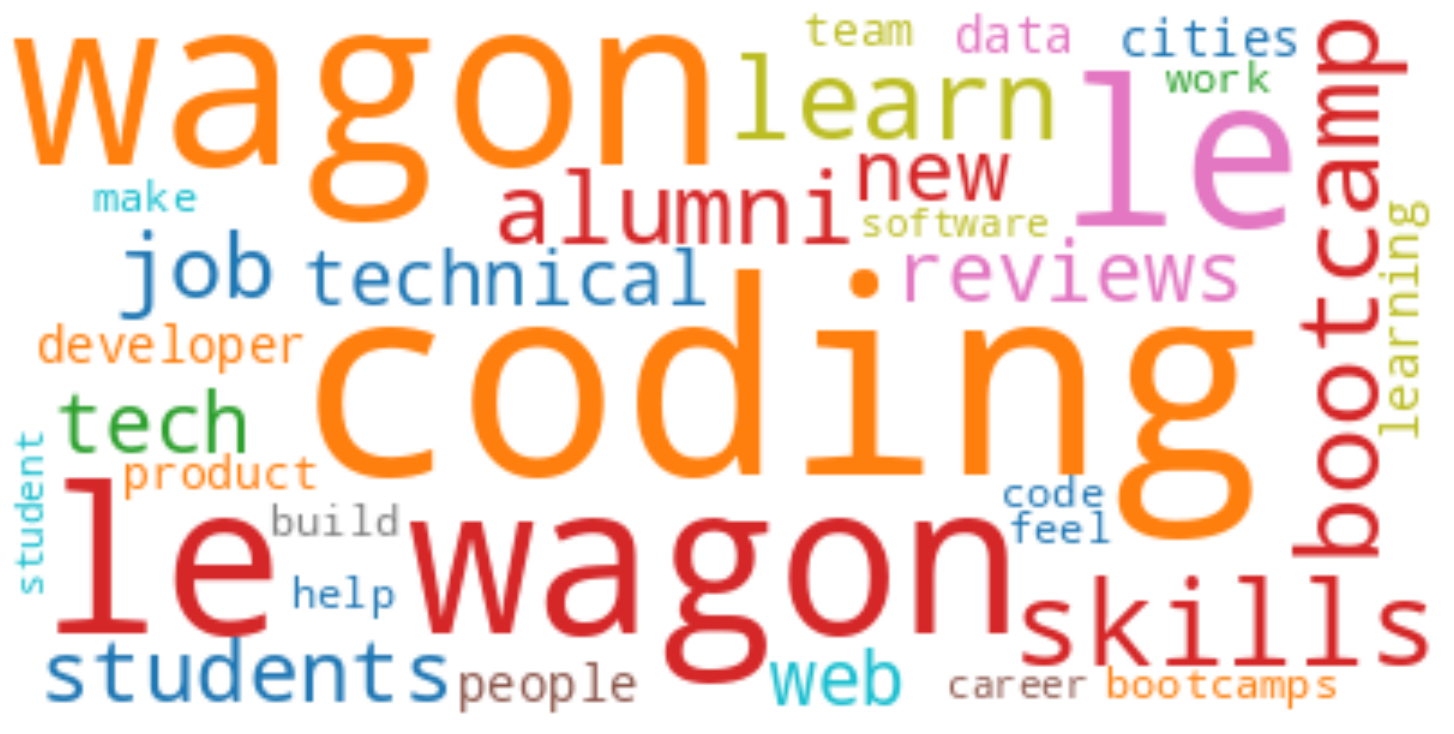

In [24]:
# plot the word cloud
get_word_cloud(most_rev_words, colormap="tab10", background_color="white")

## Sentiment Analysis

<h2><font color="ForestGreen"> Import note:</text></h2> 

<h3>For sentiment analysis, we will use the tf-idf that was used during training as this is the word space that the trained model knows how to use in order to get the sentiment prediction.</h3>

In [25]:
# get the dataframe with summaryzed document
df_summarized = sent_analysis_summary(cleaned_doc)
df_summarized

,absolutely,acting,action,actor,actors,actually,almost,along,also,although,...,worth,would,written,wrong,year,years,yes,yet,young,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# check the words that were available during training and on the document
non_zero_words = df_summarized.sum(axis = "index") > 0
df_summarized.columns[ non_zero_words ]

Index(['absolutely', 'also', 'always', 'around', 'based', 'beautiful',
       'become', 'believe', 'best', 'better', 'bit', 'could', 'course',
       'definitely', 'either', 'end', 'even', 'every', 'excellent', 'feel',
       'found', 'get', 'getting', 'give', 'going', 'good', 'great', 'help',
       'idea', 'ive', 'job', 'keep', 'know', 'last', 'least', 'left', 'life',
       'like', 'little', 'looking', 'love', 'make', 'makes', 'making', 'many',
       'might', 'much', 'need', 'new', 'part', 'people', 'perfect', 'place',
       'probably', 'production', 'real', 'right', 'role', 'seeing', 'several',
       'simply', 'since', 'small', 'something', 'start', 'sure', 'take',
       'takes', 'think', 'time', 'two', 'understand', 'us', 'use', 'version',
       'want', 'way', 'without', 'work', 'world', 'years'],
      dtype='object')

<h2><font color="ForestGreen"> Import Decision 🤔</text></h2>

- As you can see on the above dataframe, there are lots of zeros oon the columns. This happens due to the fact that lots of words that exist on the given document were not available during the model training. Once every row represents a sentence and most of the values in the rows are zero, we will end up with lots of sentences that the model has not idea about the sentiment -> prediction will be about 0.5.
<br>
<br>
- We need to decide if (1) we will make the sentiment analysis for every sentence and then somehow merge the sentiment of all sentences together or if (2) we will somehow merge all sentences together before making the sentiment prediction.
<br>
<br>
- In firs case (1), if we simply take the mean of the sentiment of all sentences, once the model has not idea about the sentiment for the majority of the sentences, the final result will probably be neutral (the mean of lots of neutral sentiment and few positive or negative will be close to neutral). 
<br>
<br>
- In the second case (2), one possible solution is to get the mean of the summary values of every column (word) where the the value is higher than 0. We will end up will just with row with the mean of non-zero values for each column. We can also take the sum instead of the mean. The result will be a polarized sentiment once neutral words won't be taken into consideration.
<br>
<br>
- In the third case (3), we can also take the average sentiment for the two previous situations.

In [27]:
# Check the prediction for the first case
pred_01 = get_sentiment_pred( df_summarized, strategy = "neutral" )
print(f"Case 01: {pred_01:.3f} -> {sentiment_score_to_word( pred_01 ).title()}")

# Check the prediction for the second case
pred_02 = get_sentiment_pred( df_summarized, strategy = "polarized" )
print(f"Case 02: {pred_02:.3f} -> {sentiment_score_to_word( pred_02 ).title()}")

# Check the prediction for the trhird case
pred_03 = get_sentiment_pred( df_summarized, strategy = "mixed" )
print(f"Case 03: {pred_03:.3f} -> {sentiment_score_to_word( pred_03 ).title()}")

Case 01: 0.550 -> Neutral 😐
Case 02: 1.000 -> Very Positive 🤩
Case 03: 0.775 -> Positive 🙂


# Project Challenges

# Lessons Learned

# Next Steps